# Tricks for Applying Machine Learning

## Machine Learning Diagnostic
It is always important to run tests to gain insight on how our learning algorithm will perform under different circumstances and gain guidance as how to improve its performance.


### Train, Cross Validation and Testing Datasets
One good way is to divide the dataset into Train, Cross Validation and Testing Dataset. I will upload a notebook on that.

## General Problems with Learning Algorithms :
## High Bias & High Variance

Our learning algorithm may fall into problems such as underfitting a dataset, known as high bias situation, because the learning algorithm is said to be biased and refuses to form complex functions to fit our data.

Reasons :
- Degree of Polynomial is low
 
  eg. trying to fit a straight line in a polynomial data (say $y= x^{2}$).
- Less  number of hidden layers and less number of neurons/units in the hidden layer, forces the Neural Network to underfit. Refer to this [Neural Network example](https://github.com/Sachinkumar04428/Machine-Learning-by-Andrew-Ng-Implementation-in-Python/blob/master/Neural%20Networks%20from%20Scratch/Multiclass%20Classification%20Neural%20Network/Multiclassification_Neural_Network_from_Scratch_1.ipynb) .

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.interpolate import make_interp_spline, BSpline

(30,) (30,) (30,)


Text(0.5, 1.0, 'Testing set')

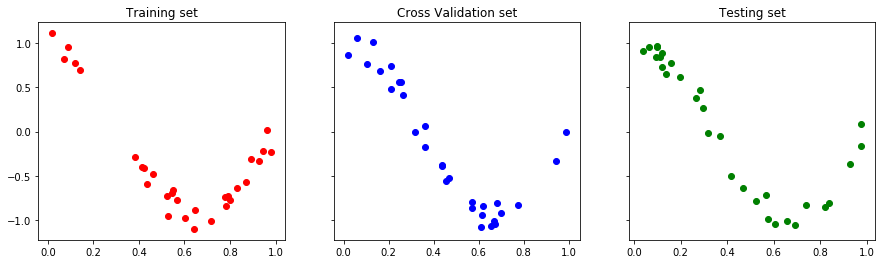

In [2]:
def true_function(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30

X_train = np.sort(np.random.rand(n_samples))
X_cv = np.sort(np.random.rand(n_samples))
X_test = np.sort(np.random.rand(n_samples))

print(X_train.shape, X_cv.shape, X_test.shape)

y_train = true_function(X_train) + np.random.randn(n_samples) * 0.1
y_cv = true_function(X_cv) + np.random.randn(n_samples) * 0.1
y_test = true_function(X_test) + np.random.randn(n_samples) * 0.1

fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
fig.set_figwidth(15)
ax[0].scatter(X_train, y_train, color='r')
ax[0].set_title('Training set')

ax[1].scatter(X_cv, y_cv, color='b')
ax[1].set_title('Cross Validation set')

ax[2].scatter(X_test, y_test, color='g')
ax[2].set_title('Testing set')

Great now let us write code to fit this model. We will try to fit hypothesis function of varying degrees to our model.

And we will save our corresponding parameters in list theta_list.

In [0]:
X_train = X_train.reshape(n_samples,1)
degrees = [1,2,5,8,11,15]
theta_list = []
X_train_list = []

def Normal_Function(x, y):
  m = x.shape[0]
  y = y.reshape(m,1)
  x = np.hstack((np.ones((m,1)), x))
  
  inverse = np.linalg.inv(np.dot(x.T,x))
  theta = np.dot(np.dot(inverse,x.T),y)
    
  return theta, x


for i in degrees:
  X_i = X_train
  for j in range(2,i+1):
    X_i = np.hstack((X_i, X_train**j))
 
  theta_i, x_i = Normal_Function(X_i, y_train) 
  theta_list.append(theta_i)
  X_train_list.append(x_i)

Now let us plot all the models with hypothesis function of varying degrees. 

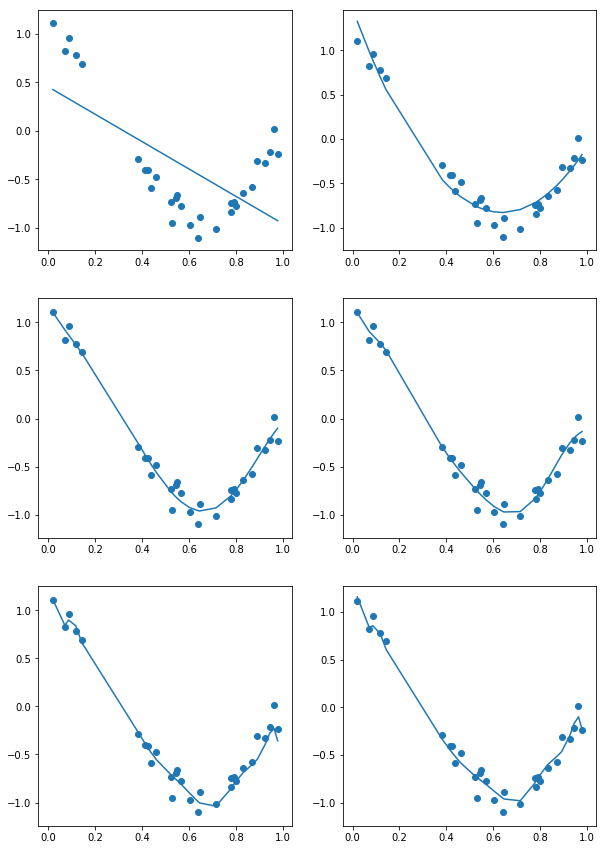

In [14]:
fig, ax = plt.subplots(nrows=3,ncols=2)
fig.set_figwidth(10)
fig.set_figheight(15)
col = 0
Y_pred_list = {}

for i in range(len(degrees)):
  x = X_train_list[i]
  theta = theta_list[i]
  Y = np.dot(x,theta)
  Y_pred_list[degrees[i]] = Y
 
  row = int(i/2) 
  ax[row,col].plot(X_train, Y)
  ax[row,col].scatter(X_train, y_train)
  col +=1
  if col%2==0:
    col=0

## Learning Curve
While doing Machine Learning Diagnostic, it is very helpful to plot the accuracy of the our model with respect to different parameters such as
- Training error and Testing error vs. degree of hypothesis function
- Training error and Testing error vs. training set size
- Training error and Testing error vs. Regularisation parameter

Text(0.5, 1.0, 'Testing error')

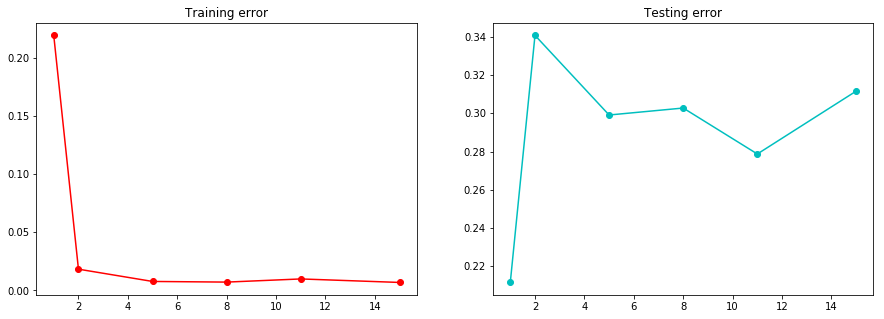

In [35]:
J_train_error = []
J_cv_error = []

for deg in degrees:
  
  y_pred = Y_pred_list[deg]
  J_train_error.append(mean_squared_error(y_train, y_pred))
  J_cv_error.append(mean_squared_error(y_cv, y_pred))

fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(5)
ax[0].plot(degrees, J_train_error, marker='o', linestyle='-', color='r')
ax[0].set_title('Training error')
ax[1].plot(degrees, J_cv_error ,marker='o', linestyle='-', color='c')
ax[1].set_title('Testing error')

Hence from the above plots we conclude following :
- As the degree of hypothesis function increases, the Training error decreases as the model goes from ***underfitting the Training data to, fitting just right to, overfitting the data***.

- Where as for the test set the error has a parabolic shape. The left side , where degree of polynomial is less, the error is high because of ***High Bias***. On the right , with hypothesis function of higher degree, the model overfits the training data and thus performs poorly on Testing set. This is a case of ***High Variance***. 

Hence from the above graphs we can easily ***conclude that hypothesis function of degree 11, best suits our needs***.

Let us plot it and check.

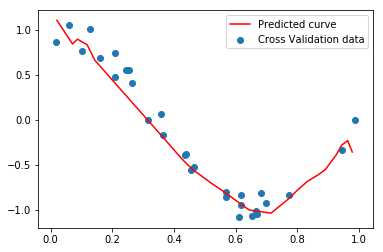

In [30]:
plt.scatter(X_cv, y_cv, label='Cross Validation data')
plt.plot(X_train, Y_pred_list[11], color='r', label='Predicted curve')
plt.legend()

## When geting more Training data helps?

When our learning algorithm is suffering with ***High Bias*** or ***High Variance***. Can we solve these problems by getting more Training data.

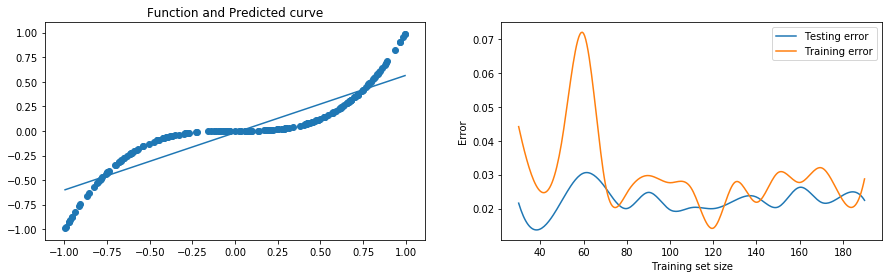

In [129]:
training_data_size = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190]
m = len(training_data_size)
J_training_error = np.zeros(m)
J_testing_error = np.zeros(m)

np.random.seed()
i = 0
for size in training_data_size:
  
  X_train = np.sort(np.random.rand(size)*2-1)
  Y_train = X_train**3
  X_test = np.sort(np.random.rand(size)*2-1)
  Y_test = X_test**3
  
  X_train = X_train.reshape(size,1)
  X_test = X_test.reshape(size,1)
  
  theta, x = Normal_Function(X_train, Y_train)
  y_pred = np.dot(x, theta)
  
  J_training_error[i] = mean_squared_error(Y_train, y_pred)
  J_testing_error[i] = mean_squared_error(Y_test, y_pred)
  i += 1  #incrementing

  
data_size = np.array(training_data_size)

new_ds = np.linspace(data_size.min(),data_size.max(),300) #300 represents number of points
                                                   #to make between data_size.min and data_size.max
spl_test = make_interp_spline(data_size, J_testing_error, k=3) #BSpline object
spl_train = make_interp_spline(data_size, J_training_error, k=3)
smooth_test = spl_test(new_ds)
smooth_train = spl_train(new_ds)

fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
ax[0].plot(X_train, y_pred, label='Predicted Function')
ax[0].scatter(X_train, Y_train, label='True Function')
ax[0].set_title('Function and Predicted curve')

ax[1].plot(new_ds, smooth_train, label='Testing error')
ax[1].plot(new_ds, smooth_test, label='Training error')
ax[1].set_xlabel('Training set size')
ax[1].set_ylabel('Error')

plt.legend()

So, we observe in the second graph that, even when the size of Training data increases, the testing error almost remains constant, or atleast doesn't decrease.

We conclude the following from the above graphs :
- ***Since our hypothesis function underfits the data, hence our algorithm is suffering from a high Bias problem. And even adding alot of training exmaples does not decrease the testing error.***


- ***Also note that Training error is almost equal to Testing error, which again shows that the Learning Algorithm is suffering from a bias problem***.


### If learning algorithm suffers from High Bias problem, getting more training data will not help much.

No handles with labels found to put in legend.


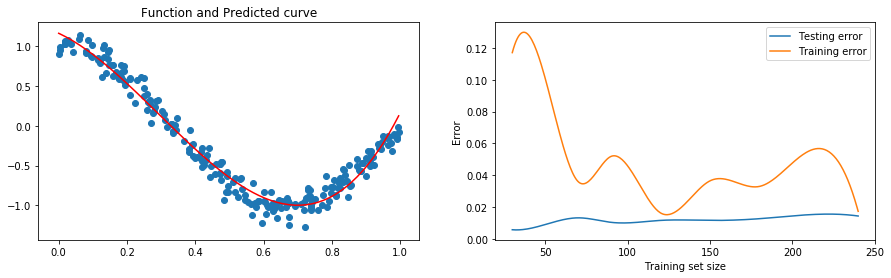

In [152]:
training_data_size = [30,50,70,90,120,150,180,210,240]
m = len(training_data_size)
J_training_error = np.zeros(m)
J_testing_error = np.zeros(m)

np.random.seed(5)
i = 0
for size in training_data_size:
  
  X_train1 = np.sort(np.random.rand(size))
  Y_train = true_function(X_train1) + np.random.randn(size) * 0.1
  X_test = np.sort(np.random.rand(size))
  Y_test = true_function(X_test) + np.random.randn(size) * 0.1
  
  X_train = X_train1.reshape(size,1)
  x_train = np.hstack((X_train,X_train**2,X_train**3))
  #x_test = np.hstack(X_test,X_test**2,X_test**3,X_test**4,X_test**5,X_test**6)
  
  theta, x = Normal_Function(x_train, Y_train)
  y_pred = np.dot(x, theta)
  
  J_training_error[i] = mean_squared_error(Y_train, y_pred)
  J_testing_error[i] = mean_squared_error(Y_test, y_pred)
  i += 1  #incrementing

  
data_size = np.array(training_data_size)

new_ds = np.linspace(data_size.min(),data_size.max(),300) #300 represents number of points
                                                   #to make between data_size.min and data_size.max
spl_test = make_interp_spline(data_size, J_testing_error, k=3) #BSpline object
spl_train = make_interp_spline(data_size, J_training_error, k=3)
smooth_test = spl_test(new_ds)
smooth_train = spl_train(new_ds)

fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
ax[0].plot(X_train1, y_pred, label='Predicted Function', color='r')
ax[0].scatter(X_train, Y_train, label='True Function')
ax[0].set_title('Function and Predicted curve')
plt.legend()
ax[1].plot(new_ds, smooth_train, label='Testing error')
ax[1].plot(new_ds, smooth_test, label='Training error')
ax[1].set_xlabel('Training set size')
ax[1].set_ylabel('Error')

plt.legend()

In the above case when the data is overfitting/fitting the Training data. We observe the following from the graphs:
- ***Training error increases as the size of Training dataset increases***. Now, this is a ***good result***  because a negligible training error means our algorithm is overfitting the training set, i.e. suffering from high variance. But as the size of Training dataset increases the variance/overfitting decreases.

- ***Testing error decreases as the size of Training dataset increases.*** Because the model becomes less overfitting and more general.

### When model suffers from High Variance, getting more Training Data helps to make the model more general.